# Descriptive Statistics

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Load the data
data = pd.read_json('../data/kickstarter.json', lines=True)
print(data.shape)

(429463, 129)


## Data Cleaning

In [3]:
# Keeping the last instance based on state_changed_at column
data = data.sort_values(by = ['id', 'creator_id', 'launched_at']).reset_index(drop = True)
data.head()

,id,photo_key,photo_full,photo_ed,photo_med,photo_little,photo_small,photo_thumb,photo_1024x576,photo_1536x864,name,blurb,goal,pledged,state,slug,disable_communication,country,country_displayable_name,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,is_starrable,backers_count,static_usd_rate,usd_pledged,converted_pledged_amount,fx_rate,usd_exchange_rate,current_currency,usd_type,creator_id,creator_name,creator_slug,creator_is_registered,creator_is_email_verified,creator_chosen_currency,creator_is_superbacker,creator_avatar_thumb,creator_avatar_small,creator_avatar_medium,creator_urls_web_user,creator_urls_api_user,location_id,location_name,location_slug,location_short_name,location_displayable_name,location_localized_name,location_country,location_state,location_type,location_is_root,location_expanded_country,location_urls_web_discover,location_urls_web_location,location_urls_api_nearby_projects,category_id,category_name,category_analytics_name,category_slug,category_position,category_parent_id,category_parent_name,category_color,category_urls_web_discover,video_id,video_status,video_hls,video_hls_type,video_high,video_high_type,video_base,video_base_type,video_tracks,video_width,video_height,video_frame,profile_id,profile_project_id,profile_state,profile_state_changed_at,profile_name,profile_blurb,profile_background_color,profile_text_color,profile_link_background_color,profile_link_text_color,profile_link_text,profile_link_url,profile_show_feature_image,profile_background_image_opacity,profile_should_show_feature_image_section,profile_feature_image_attributes_image_urls_default,profile_feature_image_attributes_image_urls_baseball_card,spotlight,urls_web_project,urls_web_rewards,percent_funded,is_liked,is_disliked,is_launched,prelaunch_activated,source_url,profile_feature_image_attributes_id,video,profile_background_image_attributes_id,profile_background_image_attributes_image_urls_default,profile_background_image_attributes_image_urls_baseball_card,is_in_post_campaign_pledging_phase,creator_has_admin_message_badge,creator_is_ksr_admin,creator_ppoHasAction,creator_ppo_has_action,friends,is_starred,is_backing,permissions,urls_api_star,urls_api_message_creator,urls_web_message_creator,photo_1024x768,photo_1536x1152,profile_should_show_feature_image
0,1293,assets/042/569/685/ff63ea0eb84ce1e987646f97a06...,https://i.kickstarter.com/assets/042/569/685/f...,https://i.kickstarter.com/assets/042/569/685/f...,https://i.kickstarter.com/assets/042/569/685/f...,https://i.kickstarter.com/assets/042/569/685/f...,https://i.kickstarter.com/assets/042/569/685/f...,https://i.kickstarter.com/assets/042/569/685/f...,https://i.kickstarter.com/assets/042/569/685/f...,https://i.kickstarter.com/assets/042/569/685/f...,Animal Instincts Poker Playing Cards & Tarot I...,Fantasy playing card decks combine the structu...,10000.0,36513.00,successful,animal-instincts-oracle-and-playing-card-decks,False,US,the United States,USD,$,True,1697119820,2023-10-12 14:10:20,2023-04-29 18:48:15,2023-09-12 14:10:20,0.0,0.0,491,1.000000,36513.000000,36513.0,1.000000,1.000000,USD,international,1276914410,David Bollt,minds-eye,NaN,NaN,None,NaN,https://i.kickstarter.com/assets/030/121/212/1...,https://i.kickstarter.com/assets/030/121/212/1...,https://i.kickstarter.com/assets/030/121/212/1...,https://www.kickstarter.com/profile/minds-eye,https://api.kickstarter.com/v1/users/127691441...,2356566.0,Asheville,asheville-nc,"Asheville, NC","Asheville, NC",Asheville,US,NC,Town,0.0,United States,https://www.kickstarter.com/discover/places/as...,https://www.kickstarter.com/locations/ashevill...,https://api.kickstarter.com/v1/discover?signat...,273,Playing Cards,Playing Cards,games/playing cards,4,12.0,Games,51627,http://www.kickstarter.com/discover/categories...,1241920.0,successful,https://v2.kickstarter.com/1713133893-L%2B7DXD...,application/x-mpegURL,https://v2.kickstarter.com/1713133893-L%2B7DXD...,"video/mp4; codecs="

## Check number of NAs in each column

In [26]:
# Get number of na values in each column
print(data.isna().sum())

id                                                                   0
photo_key                                                           75
photo_full                                                           0
photo_ed                                                             0
photo_med                                                            0
photo_little                                                         0
photo_small                                                          0
photo_thumb                                                          0
photo_1024x576                                                   10303
photo_1536x864                                                   10303
name                                                                 0
blurb                                                                0
goal                                                                 0
pledged                                                              0
state 

In [6]:
print(data.columns.tolist())

['id', 'photo_key', 'photo_full', 'photo_ed', 'photo_med', 'photo_little', 'photo_small', 'photo_thumb', 'photo_1024x576', 'photo_1536x864', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug', 'disable_communication', 'country', 'country_displayable_name', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'usd_exchange_rate', 'current_currency', 'usd_type', 'creator_id', 'creator_name', 'creator_slug', 'creator_is_registered', 'creator_is_email_verified', 'creator_chosen_currency', 'creator_is_superbacker', 'creator_avatar_thumb', 'creator_avatar_small', 'creator_avatar_medium', 'creator_urls_web_user', 'creator_urls_api_user', 'location_id', 'location_name', 'location_slug', 'location_short_name', 'location_displayable_name', 'location_localized_name', 'location_country', 'location_state', 'location

## Raw Data Descriptive Statistics

### Kickstarter by creation, launch and deadline

In [ ]:
# Show statistics of data by created year, launched year, and deadline year
data['created_at'] = pd.to_datetime(data['created_at'], unit='s')
data['launched_at'] = pd.to_datetime(data['launched_at'], unit='s')
data['deadline'] = pd.to_datetime(data['deadline'], unit='s')

data['created_year'] = data['created_at'].dt.year
data['launched_year'] = data['launched_at'].dt.year
data['deadline_year'] = data['deadline'].dt.year

# Show in one dataframe
years = pd.concat([data['created_year'].value_counts(), data['launched_year'].value_counts(), data['deadline_year'].value_counts()], axis = 1, keys=['Created Year', 'Launched Year', 'Deadline Year'])
years.sort_index()

,Created Year,Launched Year,Deadline Year
2009,1061,948,647
2010,7504,7104,6178
2011,17721,16615,15921
2012,29500,27033,27338
2013,30149,28571,28200
2014,49033,47329,45948
2015,53840,55613,55952
2016,38604,39370,39917
2017,35687,36079,36491
2018,30810,31024,31329


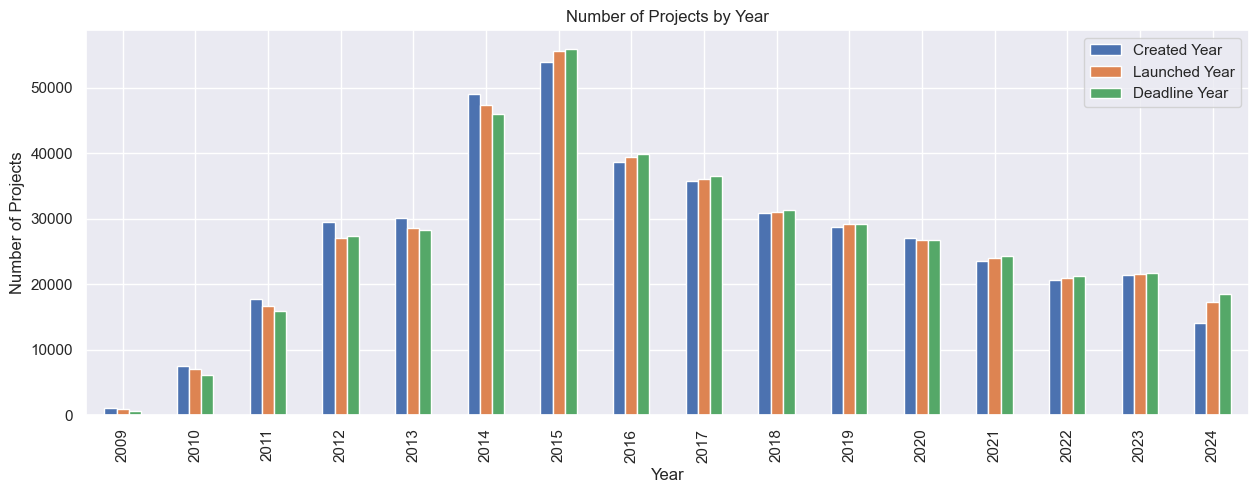

In [29]:
# Show in one plot
years.sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Number of Projects by Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.show()



### Kickstarters by Project State

In [25]:
# Get total number of projects
total_projects = len(data)
print(f'Total number of projects: {total_projects}')
print('\n')

# Total number of projects by state
projects_by_state = pd.concat([data['state'].value_counts(), data['state'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(projects_by_state)

Total number of projects: 429463


             Total  Percentage
state                         
successful  244112   56.841218
failed      164377   38.275009
canceled     20974    4.883773


### Kickstarters by Country

In [35]:
country_data = pd.concat([data['country'].value_counts(), data['country'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(country_data)

          Total  Percentage
country                    
US       300776   70.035370
GB        45402   10.571807
CA        19627    4.570126
AU         9885    2.301712
DE         7494    1.744970
FR         6053    1.409435
IT         5613    1.306981
ES         5167    1.203130
MX         4959    1.154698
HK         4231    0.985184
NL         3581    0.833832
SE         2720    0.633349
SG         1882    0.438222
JP         1818    0.423319
NZ         1728    0.402363
DK         1690    0.393515
CH         1381    0.321564
IE         1194    0.278022
BE         1156    0.269173
AT          971    0.226096
NO          864    0.201181
PL          692    0.161131
GR          378    0.088017
LU          112    0.026079
SI           89    0.020724


### Kickstarters by Category

In [ ]:
data['category_name'].value_counts().sort_index()

### Kickstarters by Dollar Goal Bins

In [23]:
data['pledged_usd_static'] = data['pledged'] * data['static_usd_rate']
data['goal_usd_static'] = data['goal'] * data['static_usd_rate']

bins = [0, 10, 100, 1000, 10000, 100000, 1000000, np.inf]

data['Goal Bins (in US$)'] = pd.cut(data['goal_usd_static'], bins, labels = ['$1-$10', '$10-$100', '$100-$1k', '$1k-$10k', '$10k-$100k', '$100k-$1M', '$1M+'])
# Also create a percentage of total in each bin
bins = pd.concat([data['Goal Bins (in US$)'].value_counts(), data['Goal Bins (in US$)'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(bins.sort_index())

                     Total  Percentage
Goal Bins (in US$)                    
$1-$10                1188    0.276625
$10-$100              7311    1.702359
$100-$1k             81754   19.036331
$1k-$10k            219664   51.148527
$10k-$100k          108971   25.373781
$100k-$1M             9664    2.250252
$1M+                   911    0.212125


### Kickstarter by Average Duration

In [34]:
# Calculate the average duration of Kickstarter
data['duration'] = (data['deadline'] - data['launched_at']).dt.days

# Calculate the average duration of Kickstarter by state
duration_by_state = data.groupby('category_name')['duration']
duration_by_state = pd.concat([duration_by_state.mean(), duration_by_state.median(), duration_by_state.min(), duration_by_state.max()], axis = 1, keys=['Mean', 'Median', 'Minimum', 'Maximum'])
print(duration_by_state)

                         Mean  Median  Minimum  Maximum
category_name                                          
3D Printing         33.693798    30.0        3       89
Academic            36.216625    30.0        1       67
Accessories         28.866444    30.0        1       60
Action              37.292512    30.0        1       60
Animals             32.895775    30.0        6       60
Animation           37.434751    30.0        1       90
Anthologies         31.206198    30.0        2       66
Apparel             33.109565    30.0        1      120
Apps                37.142075    30.0        1       92
Architecture        36.716377    30.0        4       60
Art                 28.182150    30.0        1       91
Art Books           32.903996    30.0        1       90
Audio               34.533333    30.0        5       60
Bacon               33.804444    30.0        2       60
Blues               34.876430    30.0        3       60
Calendars           28.972936    30.0        3  